<a href="https://colab.research.google.com/github/GilesLens/SteelMaterialsSelection/blob/coding/Steel%20Materials%20Selection%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries 

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV



```
# This is formatted as code
```

Import Dataset & Select Dataset 

In [ ]:
df = pd.read_csv('UTS, Yield and Type.csv')
df.head()

,Grouping,Type,Name,YS,UTS
0,Abrasion Resistant Steel,(1+0j),ABREX450,(1192+0j),(1469+0j)
1,Abrasion Resistant Steel,(1+0j),EverHard360,(1083+0j),(1246+0j)
2,Abrasion Resistant Steel,(1+0j),EverHard500,(1297+0j),(1449+0j)
3,Abrasion Resistant Steel,(1+0j),EverHard500LE,(1203+0j),(1681+0j)
4,Abrasion Resistant Steel,(1+0j),HARDOX 400,(1000+0j),(1250+0j)


In [ ]:
df.drop('Name', inplace=True, axis=1)
df.head()

,Grouping,Type,YS,UTS
0,Abrasion Resistant Steel,(1+0j),(1192+0j),(1469+0j)
1,Abrasion Resistant Steel,(1+0j),(1083+0j),(1246+0j)
2,Abrasion Resistant Steel,(1+0j),(1297+0j),(1449+0j)
3,Abrasion Resistant Steel,(1+0j),(1203+0j),(1681+0j)
4,Abrasion Resistant Steel,(1+0j),(1000+0j),(1250+0j)


In [ ]:
df['Grouping'].unique()

array(['Abrasion Resistant Steel', 'HSLA', 'Carbon Steel',
       'Chro-Moly Steel'], dtype=object)

Cleaning of Data

In [ ]:
import numpy as np

In [ ]:
df[["Type", "YS", "UTS"]] = df[["Type", "YS", "UTS"]].astype(complex)
df.head()

,Grouping,Type,YS,UTS
0,Abrasion Resistant Steel,1.0+0.0j,1192.0+0.0j,1469.0+0.0j
1,Abrasion Resistant Steel,1.0+0.0j,1083.0+0.0j,1246.0+0.0j
2,Abrasion Resistant Steel,1.0+0.0j,1297.0+0.0j,1449.0+0.0j
3,Abrasion Resistant Steel,1.0+0.0j,1203.0+0.0j,1681.0+0.0j
4,Abrasion Resistant Steel,1.0+0.0j,1000.0+0.0j,1250.0+0.0j


In [ ]:
df[["Type", "YS", "UTS"]] = df[["Type", "YS", "UTS"]].astype(int)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Grouping,Type,YS,UTS
0,Abrasion Resistant Steel,1,1192,1469
1,Abrasion Resistant Steel,1,1083,1246
2,Abrasion Resistant Steel,1,1297,1449
3,Abrasion Resistant Steel,1,1203,1681
4,Abrasion Resistant Steel,1,1000,1250


In [ ]:
df['Grouping'] = df['Grouping'].map({'Abrasion Resistant Steel' :0, 'HSLA' :1, 'Carbon Steel' :2, 'Chro-Moly Steel' :3}).astype(int)
df.head()

,Grouping,Type,YS,UTS
0,0,1,1192,1469
1,0,1,1083,1246
2,0,1,1297,1449
3,0,1,1203,1681
4,0,1,1000,1250


In [ ]:
df.to_csv('Type, YS and UTS Cleaned.csv', index = False)

EDA

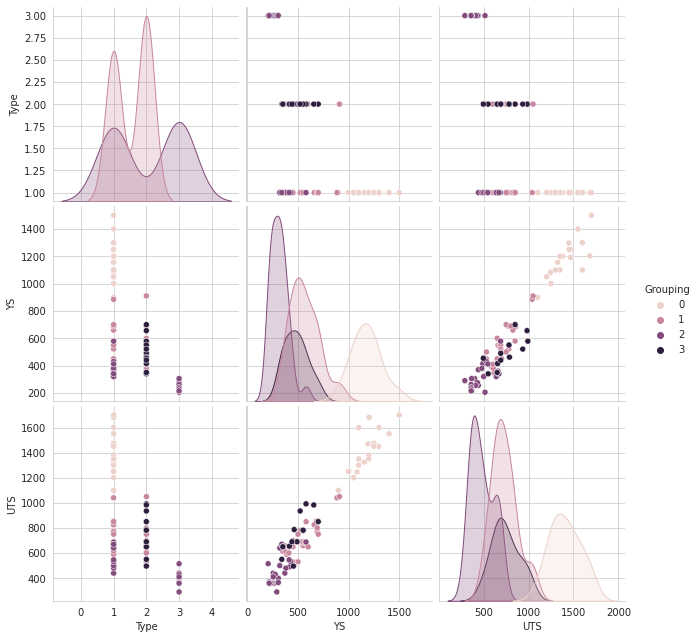

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue="Grouping", height=3);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


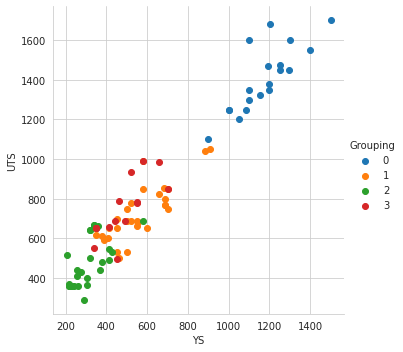

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Grouping', size=5) \
.map(plt.scatter, 'YS', 'UTS') \
.add_legend();
plt.show()

Much of the dataset's data points are intersecting with one another, even though their groupings and types are different. Can be a problem for accuracy of the ML algorithm. However, database was first created last month, so data size can still be improved to help populate the grouping and type categories 

Normalisation

In [ ]:
x_data = df.drop(['Grouping'], axis=1)
y_data = df['Grouping']

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax, columns=['Type', 'YS', 'UTS'])
data.head()

,Type,YS,UTS
0,0.0,0.762162,0.836170
1,0.0,0.677992,0.678014
2,0.0,0.843243,0.821986
3,0.0,0.770656,0.986525
4,0.0,0.613900,0.680851


Training Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_clf.predict(X_test)
print(y_pred)

[1 1 3 2 1 2 2 2 1 3 1 1 2 1 1 2 0 0]


Reading the results into a report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.62      0.71      0.67         7
           2       1.00      0.86      0.92         7
           3       0.00      0.00      0.00         2

    accuracy                           0.72        18
   macro avg       0.66      0.64      0.65        18
weighted avg       0.74      0.72      0.73        18



Tuning Hyperparameters 

In [ ]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]

In [ ]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
knn2 = KNeighborsClassifier()

In [ ]:
knn_clf2 = GridSearchCV(knn2, hyperparameters, cv=10)

In [ ]:
best_model = knn_clf2.fit(X_train,y_train)

In [ ]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 9


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 9, p = 2,metric = 'manhattan')
knn2.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
y_pred = knn2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.71      0.71      0.71         7
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         2

    accuracy                           0.78        18
   macro avg       0.65      0.68      0.66        18
weighted avg       0.73      0.78      0.75        18



Testing for AISI 1015 -  New Data Point

In [ ]:
variable = {'Type': [1], 'YS': [325], 'UTS': [385]}

AISI = pd.DataFrame(data = variable)

AISI.head()

,Type,YS,UTS
0,1,325,385


In [ ]:
AISI_Type = 2 

AISI_data_minmax = MinMaxScaler.fit_transform(AISI)

AISI_df = pd.DataFrame(AISI_data_minmax, columns=['Type', 'YS', 'UTS'])

In [ ]:
AISI_grouping = knn2.predict(AISI_df)

print(AISI_grouping)

[2]


In [ ]:
if AISI_Type == AISI_grouping:
  print('KNN Algorithm Successfully predicted group of AISI 1015 Steel, which is: ' + str(AISI_Type))

KNN Algorithm Successfully predicted group of AISI 1015 Steel, which is: 2


In [ ]:
if AISI_grouping == 2: 
  print(df[df['Grouping'] == 2])

    Grouping  Type   YS  UTS
48         2     1  350  650
49         2     1  360  660
50         2     1  370  440
51         2     1  415  490
52         2     1  380  480
53         2     1  320  500
54         2     1  430  530
55         2     1  320  640
56         2     1  579  688
57         2     1  340  670
58         2     1  412  546
59         2     1  320  640
60         2     1  340  670
61         2     3  290  290
62         2     3  215  370
63         2     3  305  400
64         2     3  255  440
65         2     3  275  430
66         2     3  255  410
67         2     3  205  515
68         2     3  262  359
69         2     3  305  365
70         2     3  240  360
71         2     3  220  360
72         2     3  230  360
73         2     3  215  360
74         2     3  215  360


Getting Neighbor values 

In [ ]:
knn2.fit(X_train,y_train)

test = AISI.iloc[0]
test_array = test.values
test_reshaped = test_array.reshape((1,-1))

print(knn2.kneighbors(test_reshaped))


(array([[709.        , 709.18360306, 709.22536214, 709.24281881,
        709.37035516, 709.37980229, 709.40166763, 709.45861059,
        709.47988718]]), array([[49, 20, 70, 30, 40, 47, 41, 59, 68]]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Get Material Selection

In [ ]:
df_select = pd.read_csv('UTS, Yield and Type.csv')

In [ ]:
index_array = [49, 20, 70, 30, 40, 47, 41, 59, 68]
index_array.sort(reverse = True)

In [ ]:
print(index_array)

[70, 68, 59, 49, 47, 41, 40, 30, 20]


In [ ]:
list_of_selectedmats = df_select.iloc[[70, 68, 59, 49, 47, 41, 40, 30, 20]]

In [ ]:
print(list_of_selectedmats)

        Grouping    Type              Name           YS           UTS
70  Carbon Steel  (3+0j)  NF A49-323-TU37b     (240+0j)      (360+0j)
68  Carbon Steel  (3+0j)  A513-Type 2-1020     (262+0j)      (359+0j)
59  Carbon Steel  (1+0j)    DIN 17204 Ck45     (320+0j)      (640+0j)
49  Carbon Steel  (1+0j)          JIS S28C     (360+0j)      (660+0j)
47          HSLA  (2+0j)         SAE 1137V  (579.16+0j)  (992.845+0j)
41          HSLA  (2+0j)            20MnV6     (500+0j)      (690+0j)
40          HSLA  (2+0j)       DOCOL 600LA     (600+0j)      (650+0j)
30          HSLA  (1+0j)        ISO E690-E     (690+0j)      (770+0j)
20          HSLA  (1+0j)   NK-HITEN 780 LE     (685+0j)      (855+0j)
